In [1]:
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [ ]:
# mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train[0])

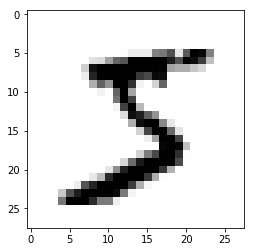

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [37]:
print(y_train[0])

5


In [38]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2528 - accuracy: 0.9260
Epoch 2/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1031 - accuracy: 0.9682
Epoch 3/3
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0702 - accuracy: 0.9774


In [40]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0938 - accuracy: 0.9713
0.09380348781645298
0.9713


In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [42]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2599 - accuracy: 0.9234
Epoch 2/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1044 - accuracy: 0.9677
Epoch 3/3
10000/10000 [==============================] - 0s 33us/sample - loss: 0.0925 - accuracy: 0.9717
0.09251106615886093
0.9717


In [44]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')

W0526 16:20:36.047695 4698580416 hdf5_format.py:266] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [45]:
predictions = new_model.predict(x_test)
print(predictions)

[[5.12544229e-10 4.47501414e-09 2.88129570e-07 ... 9.99990344e-01
  1.84777971e-08 5.30399348e-07]
 [1.86816322e-08 1.37345130e-02 9.84894454e-01 ... 1.33466676e-06
  1.53484783e-04 4.12517176e-09]
 [6.43369731e-07 9.99580204e-01 8.69579817e-05 ... 1.15036695e-04
  1.10586887e-04 5.31341414e-07]
 ...
 [2.76191803e-09 3.70742328e-07 1.70630106e-08 ... 2.19504891e-05
  1.99288962e-07 4.44919679e-05]
 [5.64217714e-07 4.63553988e-06 2.23589556e-08 ... 1.30517810e-06
  2.36876309e-04 1.00360054e-07]
 [4.32114035e-07 1.11030527e-08 1.55407889e-07 ... 6.97340709e-12
  4.00188611e-07 6.17906037e-09]]


In [46]:
import numpy as np

In [47]:
print(np.argmax(predictions[0]))

7


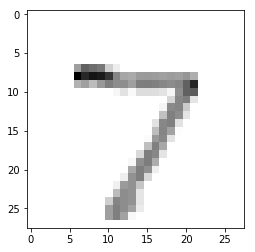

In [48]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()